## Example 1 (簡單線性回歸)
先從簡單的線性回歸舉例，![](https://chart.googleapis.com/chart?cht=tx&chl=y%20%3D%20ax%20%2B%20b) ，![](https://chart.googleapis.com/chart?cht=tx&chl=a) 稱為斜率，![](https://chart.googleapis.com/chart?cht=tx&chl=b) 稱為截距。

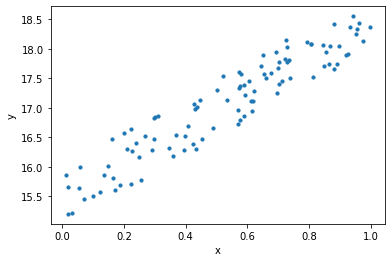

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# 亂數產生資料
np.random.seed(0)
noise = np.random.rand(100, 1)
x = np.random.rand(100, 1)
y = 3 * x + 15 + noise
# y=ax+b Target function  a=3, b=15


# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## KNN Regression
KNN 不僅能夠作為分類器，也可以做回歸連續性的數值預測。其預測值為k個最近鄰居的值的平均值。

Parameters:
- n_neighbors: 設定鄰居的數量(k)，選取最近的k個點，預設為5。
- algorithm: 搜尋數演算法{'auto'，'ball_tree'，'kd_tree'，'brute'}，可選。
- metric: 計算距離的方式，預設為歐幾里得距離。

Attributes:
- classes_: 取得類別陣列。
- effective_metric_: 取得計算距離的公式。

Methods:
- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- score: 預測成功的比例。


In [2]:
from sklearn.neighbors import KNeighborsRegressor

# 建立KNN模型
knnModel = KNeighborsRegressor(n_neighbors=3)
# 使用訓練資料訓練模型
knnModel.fit(x,y)
# 使用訓練資料預測
predicted= knnModel.predict(x)

### 模型評估
scikit-learn KNN迴歸模型的score函式是R2 score，可作為模型評估依據，其數值越接近於1代表模型越佳。
除了R2 score還有其他許多回歸模型的評估方法，例如： MSE、MAE、RMSE。

In [3]:
from sklearn import metrics
print('R2 score: ', knnModel.score(x, y))
mse = metrics.mean_squared_error(y, predicted)
print('MSE score: ', mse)

R2 score:  0.9251924828843394
MSE score:  0.0554014089707124


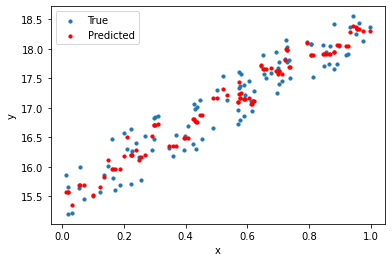

In [4]:
# plot
plt.scatter(x, y, s=10, label='True')
plt.scatter(x, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## Example 2 (非線性回歸)
上面的例子資料都很均勻分布在一條直線上，但現實的資料可能並只會發生在一條線上。下面示範一個多項次的回歸模型例子。

In [5]:
x = np.array([[1.40280301e-01],[9.03857692e-01],[5.35815131e-01],[3.58391981e-01],[2.43418162e-02],[2.43342904e-02],[3.37370600e-03],[7.50261116e-01],[3.61339257e-01],[5.01366775e-01],[4.23721405e-04],[9.40725121e-01],[6.92960750e-01],[4.50878979e-02],[3.30603187e-02],[3.36372142e-02],[9.25633424e-02],[2.75369313e-01],[1.86576499e-01],[8.48144121e-02],[3.74363965e-01],[1.94585372e-02],[8.53484957e-02],[1.34221000e-01],[2.07999831e-01],[6.16501290e-01],[3.98696193e-02],[2.64437058e-01],[3.50955021e-01],[2.15764084e-03],[3.69110747e-01],[2.90784768e-02],[4.23170975e-03],[9.00383763e-01],[9.32445223e-01],[6.53506272e-01],[9.27895484e-02],[9.53984185e-03],[4.68174835e-01],[1.93734218e-01]])
y = np.array([ 5.82469676e+00,  7.94613194e+00,  9.24976070e+00,  6.59761731e+00,
        2.16651685e+00, -2.50365745e-03, -1.00182588e+00,  9.02075194e+00,
        8.57086436e+00,  8.50848958e+00, -7.34549241e-02,  8.73802779e+00,
        7.26038154e+00,  2.38778217e+00,  2.02397265e+00,  3.57417666e+00,
        5.15052189e+00,  5.57291682e+00,  6.83461431e+00,  4.20408429e+00,
        7.21499207e+00,  2.24057093e+00,  5.63575746e+00,  6.66180813e+00,
        5.91402744e+00,  8.29511673e+00,  3.18174801e+00,  8.23158707e+00,
        7.30330971e+00,  2.55480191e-02,  6.76197223e+00,  1.05656839e+00,
        1.21851645e+00,  1.03566236e+01,  8.95941549e+00,  9.67640393e+00,
        5.17463285e+00,  2.25781800e-01,  8.60137397e+00,  8.13359834e+00])

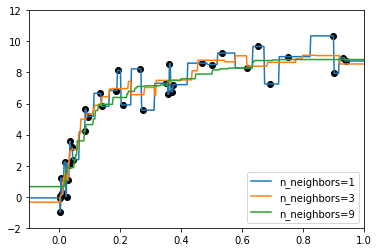

In [6]:
#測試資料集
x_test = np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(x.ravel(),y,color='black')
#1,3,9的不同的K
for k in [1,3,9]:
    y_test=knnModel = KNeighborsRegressor(n_neighbors=k).fit(x,y).predict(x_test)
    plt.plot(x_test.ravel(),y_test,label='n_neighbors={}'.format(k))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='lower right')